# Try [`scuff-em`](http://homerreid.github.io/scuff-em-documentation/) in your browser!
This uses the services of [mybinder.org](http://mybinder.org) to run a Docker container with `scuff-em` precompiled in the browser, with the interface provided by [Jupyter](http://jupyter.org) notebooks. The notebook is written in python 3 using the [IPython kernel](http://ipython.readthedocs.org/en/latest/), which provides convenient "magic" functions to call shell commands etc, but also allows for nice plotting in the notebook. You can execute each cell using `Shift+Enter`.

## some setup code for plotting

In [1]:
from cycler import cycler
%pylab inline
%config InlineBackend.figure_formats = ['retina']
style.use(['seaborn-deep','seaborn-notebook'])
rc('axes',prop_cycle=cycler('color',['#4C72B0','#C44E52','#55A868','#8172B2','#CCB974','#64B5CD']))

Populating the interactive namespace from numpy and matplotlib


# Try some scuff example
We have included all the examples of `scuff-em` here. Check what is available:

In [2]:
%ls

CubeTorus.md          MieScattering/               SiC.mie        TipSubstrate/
DielectricShell/      NanostructureCasimirPolder/  SiO2Spheres/   examples.md
DiffractionPatterns/  PECScreens.md                SiliconBeams/  index.ipynb
Dockerfile            PlatonicSolids/              SiliconSlabs/
HalfSpaceLDOS/        README.md                    ThinFilm/


# Mie scattering example
We now follow the [Mie Scattering](http://homerreid.github.io/scuff-em-documentation/examples/MieScattering/MieScattering/) example from the scuff-em documentation. SiC.mie is the output of the Mie.math mathematica script.

In [3]:
%cd MieScattering
%mv ../SiC.mie .
%ls

/home/main/notebooks/MieScattering
GoldData.png     MieScattering.md  SiCData.png  SphereMesh.png
L0P5RCoarse.png  OmegaValues.dat   Sphere.geo   SphereSurfaceCurrents.png
Mie.math         SiC.mie           Sphere.msh


## Create .msh file from .geo using [Gmsh](http://gmsh.info/)

In [4]:
%%bash
gmsh -2 -clscale 1.0 Sphere.geo

Info    : Running 'gmsh -2 -clscale 1.0 Sphere.geo' [Gmsh 2.8.5, 1 node, max. 1 thread]
Info    : Started on Sun Feb 28 10:53:34 2016
Info    : Reading 'Sphere.geo'...
Info    : Done reading 'Sphere.geo'
Info    : Meshing 1D...
Info    : Meshing curve 1 (Circle)
Info    : Meshing curve 2 (Circle)
Info    : Meshing curve 3 (Circle)
Info    : Meshing curve 4 (Circle)
Info    : Meshing curve 5 (Circle)
Info    : Meshing curve 6 (Circle)
Info    : Meshing curve 7 (Circle)
Info    : Meshing curve 8 (Circle)
Info    : Meshing curve 9 (Circle)
Info    : Meshing curve 10 (Circle)
Info    : Meshing curve 11 (Circle)
Info    : Meshing curve 12 (Circle)
Info    : Done meshing 1D (0 s)
Info    : Meshing 2D...
Info    : Meshing surface 14 (Ruled surface, MeshAdapt)
Info    : Meshing surface 16 (Ruled surface, MeshAdapt)
Info    : Meshing surface 18 (Ruled surface, MeshAdapt)
Info    : Meshing surface 20 (Ruled surface, MeshAdapt)
Info    : Meshing surface 22 (Ruled surface, MeshAdapt)
Info    : Mes

## Create scuff geometry description file

In [5]:
%%writefile SiCSphere.scuffgeo
MATERIAL SiliconCarbide
   EpsInf = 6.7;
   a0     = -3.32377e28;
   a1     = +8.93329e11;
   b0     = -2.21677e28;
   b1     = 8.93329e11;
   Eps(w) = EpsInf * (a0 + i*a1*w + w*w) / ( b0 + i*b1*w + w*w);
ENDMATERIAL 

OBJECT TheSphere
        MESHFILE Sphere.msh
        MATERIAL SiliconCarbide
ENDOBJECT

Writing SiCSphere.scuffgeo


## Check input frequencies
Since we have limited computational power on mybinder, we don't use the frequencies provided with the example (`OmegaValues.dat`), but create our own list with fewer frequencies.

In [6]:
omegas = logspace(log10(0.1),log10(5),10)
savetxt("OmegaValues_mybinder.dat",omegas)
!cat OmegaValues_mybinder.dat

1.000000000000000056e-01
1.544452104946378856e-01
2.385332304473300746e-01
3.684031498640386593e-01
5.689810202763907476e-01
8.787639344404101216e-01
1.357208808297453162e+00
2.096144000826768217e+00
3.237394014347626303e+00
5.000000000000000888e+00


## Create file with command line arguments
NB: In the example on the scuff-em homepage, we used `OmegaFile OmegaValues.dat`, we here use `OmegaValues_mybinder.dat` instead.

In [7]:
%%writefile Args
geometry SiCSphere.scuffgeo
OmegaFile OmegaValues_mybinder.dat
PFTFile SiCSphere.PFT
Cache Sphere.cache
pwDirection 0 0 1
pwPolarization 1 0 0

Writing Args


## Run `scuff-scatter`
This takes about 7 minutes on mybinder.org.

In [8]:
%%bash
time scuff-scatter < Args

Thank you for your support.



real	6m24.797s
user	5m49.704s
sys	0m0.124s


In [9]:
%ls

Args              OmegaValues_mybinder.dat  Sphere.geo
GoldData.png      SiC.mie                   Sphere.msh
L0P5RCoarse.png   SiCData.png               SphereMesh.png
Mie.math          SiCSphere.PFT             SphereSurfaceCurrents.png
MieScattering.md  SiCSphere.scuffgeo        scuff-scatter.log
OmegaValues.dat   Sphere.cache


check the scuff-scatter log file

In [10]:
!cat scuff-scatter.log

02/28/16::10:53:35: scuff-scatter running on notebook-server 
02/28/16::10:53:35: Flipped 336 panel normals to comport with region definitions. 
02/28/16::10:53:35: Could not open FIPPI cache file Sphere.cache... 
02/28/16::10:53:35: Working at frequency 0.1... 
02/28/16::10:53:35: Assembling BEM matrix block (0,0) 
02/28/16::10:54:12: Writing FIPPI cache to file Sphere.cache... 
02/28/16::10:54:12:  ...wrote 10941 FIPPI records. 
02/28/16::10:54:12:   LU-factorizing BEM matrix... 
02/28/16::10:54:12:   Assembling the RHS vector... 
02/28/16::10:54:12:   Solving the BEM system... 
02/28/16::10:54:12: Computing power, force, torque at Omega=0.1 (method: EPOverlap)... 
02/28/16::10:54:12: Computing EPP for surface 0 (without symmetry) 
02/28/16::10:54:46: Working at frequency 0.154445... 
02/28/16::10:54:46: Assembling BEM matrix block (0,0) 
02/28/16::10:54:56:   LU-factorizing BEM matrix... 
02/28/16::10:54:56:   Assembling the RHS vector... 
02/28/16::10:54:56:   Solving the BEM syste

# Plot the results

In [11]:
# columns in SiC.mie (according to Mie.math comments):
#   0: size parameter (ka = 2*pi*a / lambda ; a = sphere radius)
#   1: Re Eps(w)
#   2: Im Eps(w)
#   3: Sigma_Absorption
#   4: Sigma_Scattering
#   5: maximum l-value of spherical multipoles retained to achieve
#      two-digit accuracy in computing the cross-sections     
mie_data = loadtxt('SiC.mie',unpack=True)

In [12]:
!head -13 SiCSphere.PFT
# column 2 (number 1 in python 0-based indexing) has text, ignore that one
usecols = [0] + list(range(2,10))
scuff_data = loadtxt('SiCSphere.PFT',unpack=True,usecols=usecols)

# scuff-scatter run on notebook-server (02/28/16::10:54:12)
# data file columns: 
# 1 omega           (rad/sec) 
# 2 surface label 
# 3 absorbed power  (watts)
# 4 scattered power (watts)
# 5 x-force         (nanonewtons)
# 6 y-force         (nanonewtons)
# 7 z-force         (nanonewtons)
# 8 x-torque        (nanonewtons * microns)
# 9 y-torque        (nanonewtons * microns)
#10 z-torque        (nanonewtons * microns)
0.1 TheSphere 1.467802e-07 5.942326e-07 -9.495845e-06 -5.421520e-06 1.739045e-06 -3.199428e-06 1.401756e-05 2.671218e-05 


In [13]:
# prefactor to convert from Mie cross section to scattered power, Z0 = 376. in scuff units
cS=1/(2*376.73031346177)

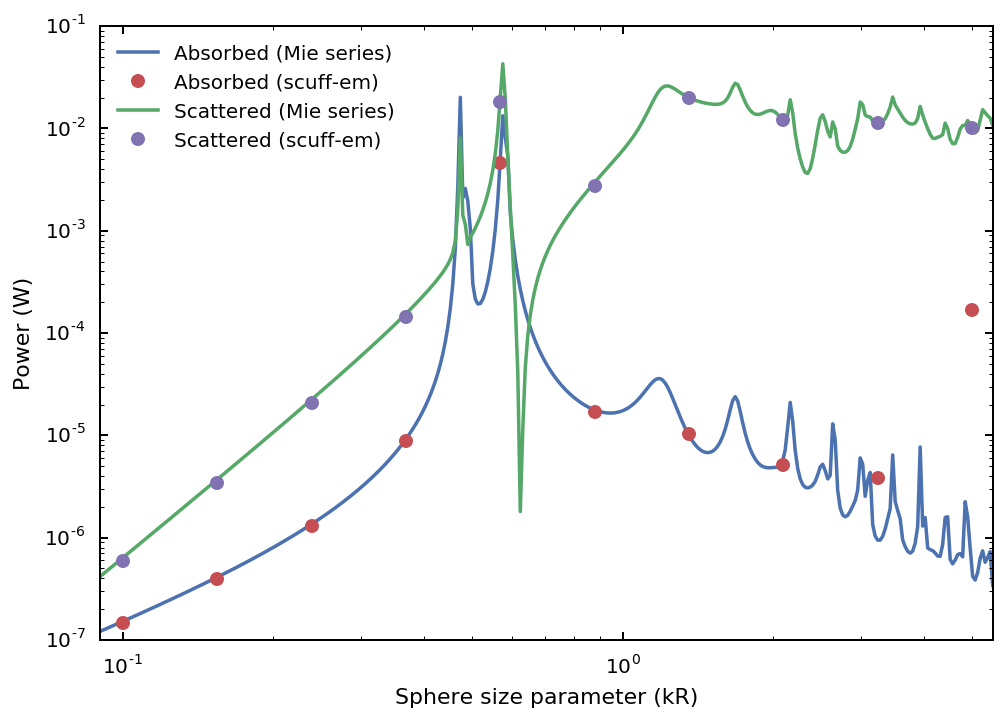

In [14]:
plot(  mie_data[0],cS*mie_data[3],'-',label='Absorbed (Mie series)')
plot(scuff_data[0], scuff_data[1],'o',label='Absorbed (scuff-em)')
plot(  mie_data[0],cS*mie_data[4],'-',label='Scattered (Mie series)')
plot(scuff_data[0], scuff_data[2],'o',label='Scattered (scuff-em)')
xscale('log')
yscale('log')
xlim(9e-2,5.5)
ylim(1e-7,0.1)
xlabel('Sphere size parameter (kR)')
ylabel('Power (W)')
legend(loc='upper left',frameon=False,numpoints=1);